<a href="https://colab.research.google.com/github/kumarirakhi19/NYC-Taxi-Trip-Time-Prediction-/blob/main/NYC_TEAM_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
!pip install pycountry
!pip install haversine

     |████████████████████████████████| 10.1 MB 2.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=47f05413f242f27517a58ce7251453d7f1c4460770d84bba655c4efe883776c4
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick
import plotly.express as px
from numpy import math
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from haversine import haversine
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [3]:
# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading DataSet**

In [4]:
# creating directory path
df = pd.read_csv('/content/drive/MyDrive/NYC Taxi Data (1).csv')

In [5]:
dfm=df.copy()

Now, we have our dataset which was of the type ‘csv’ in a pandas dataframe which we have named ‘df’.

# **File Structure and content**

In [6]:
#no. of row and column
print("We have {} rows.".format(dfm.shape[0]))
print("We have {} columns.".format(dfm.shape[1]))
dfm.iloc[1,:]

We have 1458644 rows.
We have 11 columns.


id                              id2377394
vendor_id                               1
pickup_datetime       2016-06-12 00:43:35
dropoff_datetime      2016-06-12 00:54:38
passenger_count                         1
pickup_longitude               -73.980415
pickup_latitude                 40.738564
dropoff_longitude              -73.999481
dropoff_latitude                40.731152
store_and_fwd_flag                      N
trip_duration                         663
Name: 1, dtype: object

At first galance, We have seen that the type of each variable and how they look like

# **MISSING VALUES**
Knowing about missing values is important because they indicate how much we dont's know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [7]:
#check null values in Data frame
dfm.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Fortunately, in this dataset we do not have any missing values which is great

# **Describing Dataset**

In [8]:
# Visualizing the dataset
dfm.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
# summery of dataframe
dfm.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


* Some insights from the above summary:

* Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

* Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

* The minimum trip duration is also quite low. We will come back to this later during Univariate Analysis.

In [10]:
#data type of columns
dfm.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

* We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the vendor_id, passenger_count, and trip_duration are of type int.

* pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.

In [11]:
#Check count of unique id's in the dataset
dfm.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

* There are 1458644 unique id's in Training dataset, which is equal to the number of records

* There are 2 unique vendor ids.

* There are 10 unique passenger counts.

* There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

# **Reformatting features**
There are a variety of features within the dataset and it is important to convert them into the right format such that we can analyse them easily. This would include converting datetime features and string features.

Also, one important thing is never to take assumptions without backing it with data. Here, as you can see the trip duration can also be calculated pick up and drop off datetime. We will check whether the given duration is consistent with the calculated trip duration

In [12]:
#converting string to datetime features
dfm['pickup_datetime']=pd.to_datetime(dfm.pickup_datetime)
dfm['dropoff_datetime']=pd.to_datetime(dfm.dropoff_datetime)

#converting yes/no flag to 1 and 0
dfm['store_and_fwd_flag']=1*(dfm.store_and_fwd_flag.values=='Y')

dfm['check_trip_duration'] = (dfm['dropoff_datetime'] - dfm['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = dfm[np.abs(dfm['check_trip_duration'].values  - dfm['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

This implies that there is no inconsistency in data wrt the drop location and trip duration

# **Target Exploration and Data Visualization**

In this section we will take at the trip duration is the target variable. It is crucial to understand it in detail as this is what we ate trying to predict accurately.

# **Univariate Analysis**

In this section we will take at the trip duration is the target variable. It is crucial to understand it in detail as this is what we ate trying to predict accurately.

In [13]:
dfm['trip_duration'].describe()/3600   # trip_duration in hour

count    405.178889
mean       0.266526
std        1.454842
min        0.000278
25%        0.110278
50%        0.183889
75%        0.298611
max      979.522778
Name: trip_duration, dtype: float64

Hey! There is a trip with duration of 979 hours. This is a huge outlier and might create problem at the prediction stage. One idea is to log transform the trip duration before prediction to visualize it before.

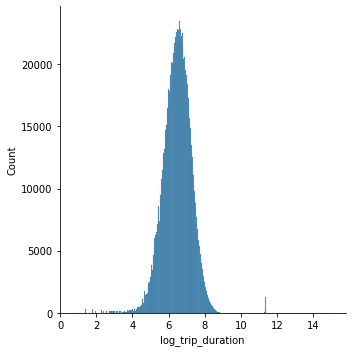

In [14]:
dfm['log_trip_duration']=np.log(dfm['trip_duration'].values+1)
sns.displot(dfm['log_trip_duration'], kde=False, bins=500)
plt.show()

1.There are several suspiciously short rides with less than 10 seconds duration

2.As discussed earlier, there are few huge outliers near 12.

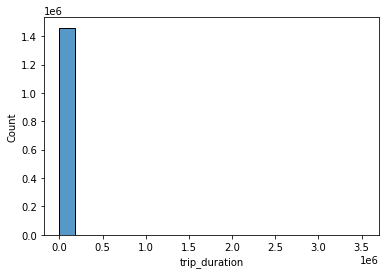

In [15]:
sns.histplot(dfm['trip_duration'],kde=False,bins=20)

The histogram is really skewed as we can see.
Let us also look at the boxplot.

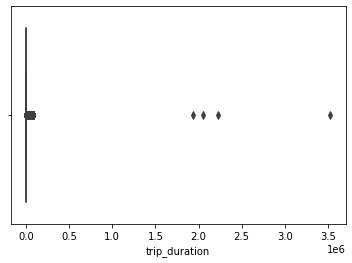

In [16]:
sns.boxplot(dfm['trip_duration'])

In [17]:
dfm['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

We can see that there is an entry which is significantly different from others.

**vendor_id**

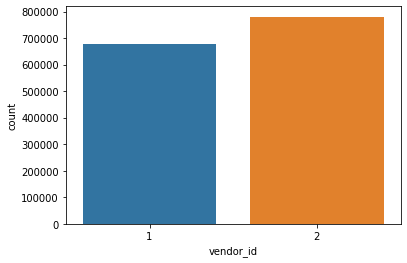

In [18]:
sns.countplot(x='vendor_id',data=dfm)

We see that there is not much difference between the trips taken by both vendors

**passenger_count**

In [19]:
dfm.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

There are some trips with even 0 passenger count.

There is only 1 trip each for 7,8 and 9 passengers.

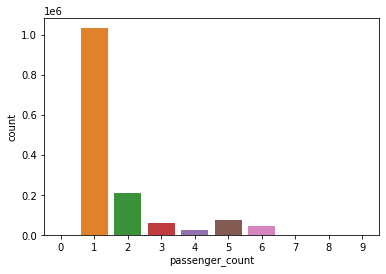

In [20]:
sns.countplot(x='passenger_count',data=dfm)

We see the highest amount of trips are with 1 passenger.

**Latitude and Longitude**

Lets look at the geospatial or location features to check consistency. They should not vary much as we are only considering trips within New York city.

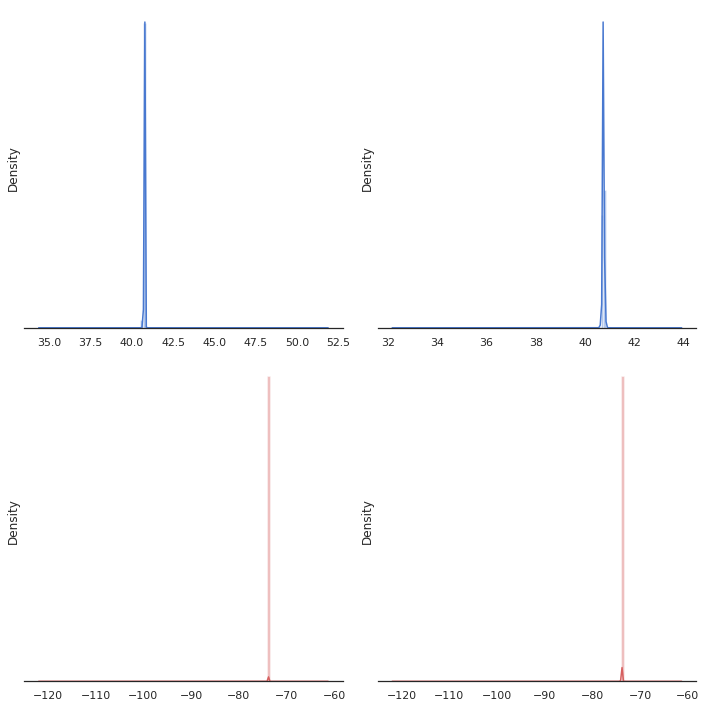

In [21]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(dfm['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(dfm['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(dfm['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(dfm['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Findings - (Here, red represents pickup and dropoff Longitudes & blue represents pickup & dropoff lattitudes)

1. From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73.
2. Some extreme co-ordinates has squeezed the plot such that we see a spike here
3. A good idea is to remove these outliers and look at the distribution more closely

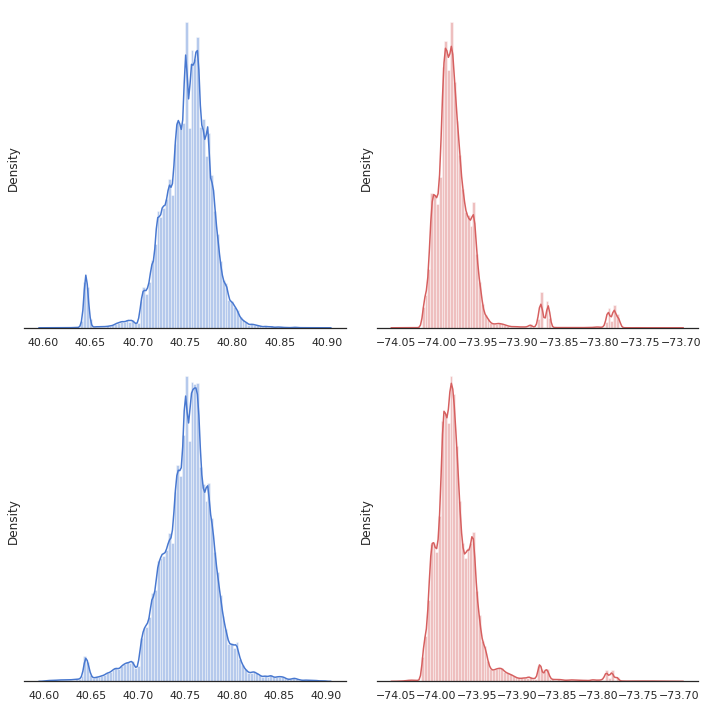

In [22]:
dfm= dfm.loc[(dfm.pickup_latitude > 40.6) & (dfm.pickup_latitude < 40.9)]
dfm= dfm.loc[(dfm.dropoff_latitude>40.6) & (dfm.dropoff_latitude < 40.9)]
dfm = dfm.loc[(dfm.dropoff_longitude > -74.05) & (dfm.dropoff_longitude < -73.7)]
dfm= dfm.loc[(dfm.pickup_longitude > -74.05) & (dfm.pickup_longitude < -73.7)]
df_data_new = dfm.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

* We have a much better view of the distribution of coordinates instead of spikes. And we see that most trips are concentrated between these lat long only with a few significant clusters.
* These clusters are represented by the numerous peaks in the lattitude and longitude histograms

**store_and_fwd_flag**

0    1444400
1       7985
Name: store_and_fwd_flag, dtype: int64

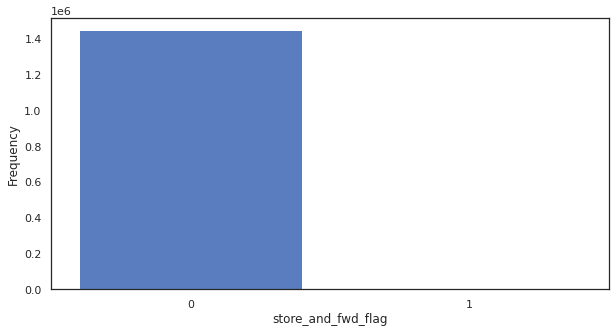

In [23]:
# store and fwd flag count
plt.figure(figsize=(10,5))
sns.countplot(dfm['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

dfm['store_and_fwd_flag'].value_counts()

The store_and_fwd_flag values, indicating whether the trip data was sent immediately to the vendor('0') or held in the memory of the taxi because there was no connection to the server('1'), show that there was almost no storing taking place.

Now, we will delve into the datetime features to understand the trend of number of hourly/monthly/daily taxi trips

In [24]:
dfm['pickup_datetime'].min(), dfm['pickup_datetime'].max()

(Timestamp('2016-01-01 00:00:17'), Timestamp('2016-06-30 23:59:39'))

Clearly, These trips are for first 6 months of 2016. To look at trends, we first need to extract week days and hour of day from the pickup date.

In [25]:
# creating a new column(day_of_week) from the pickup_datetime column
dfm['day_of_week']=dfm['pickup_datetime'].dt.weekday
# creating a new column(hour_of_week) from the pickup_datetime column
dfm['hour_of_day']=dfm['pickup_datetime'].dt.hour

Text(0, 0.5, 'frequency')

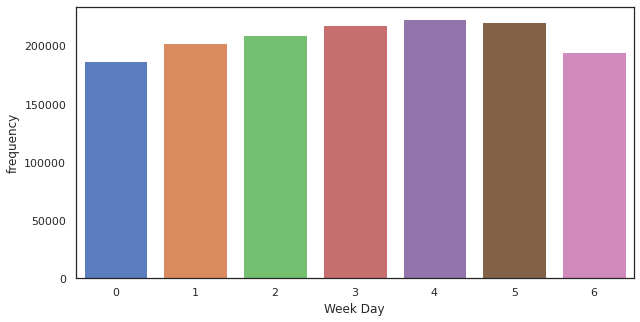

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(dfm['day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('frequency')

Number of pickups for weekends is much lower than weeks days with a peak on Thurusday(4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday

Text(0, 0.5, 'frequency')

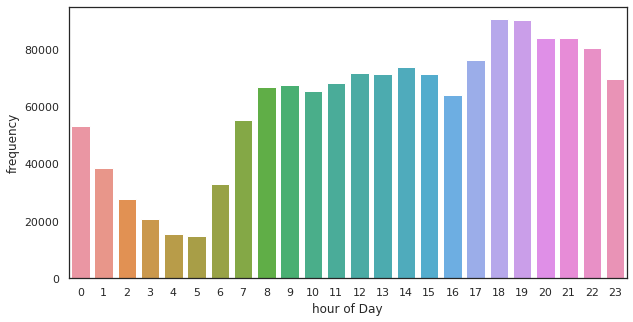

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(dfm['hour_of_day'])
plt.xlabel('hour of Day')
plt.ylabel('frequency')

Number of pickups as expected is highest in late evening. However, it is much lower during the morning peak hours.

# **Bivariate Analysis**

Now that we have gone through all the basic features one by one. Let us start looking at their relation with the target. This will help us in selecting and extracting features at the modelling stage.

**Trip Duration vs Weekday**

For different week days, the trip durations can vary as different week days might have different traffic densities especially the weekends might have a much different patterns as compared to working days. Weekday is taken as a decimal number, where 0 - Sunday and 6 is Saturday.

Text(0.5, 0, 'Week_day')

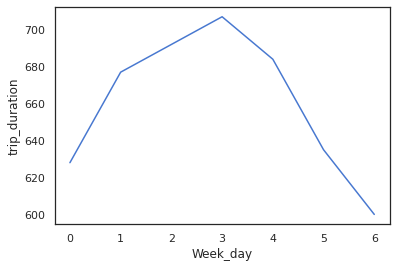

In [28]:
summary_wdays_avg_duration = pd.DataFrame(dfm.groupby(['day_of_week'])['trip_duration'].median())
X=[0,1,2,3,4,5,6]
Y=summary_wdays_avg_duration['trip_duration']
sns.lineplot(X,Y)
plt.xlabel("Week_day")

**vendor_id vs Trip Duration**

Let's check how the trip duration varies for different vendors.

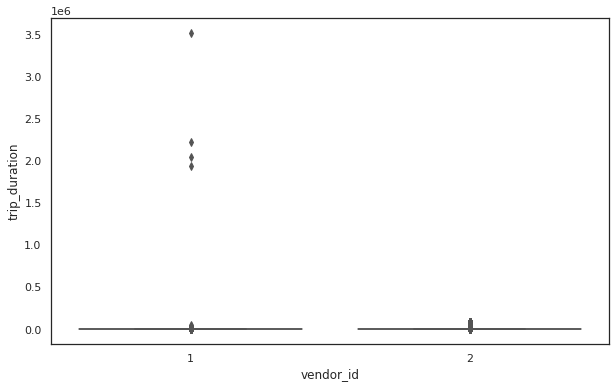

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="vendor_id", y="trip_duration", data=dfm)
plt.show()

Woah! This did not came out as expected. The only thing I can see from this boxplot is that for vendor 2, there are a number of outliers exceeding 24 hours while vendor 1 does not have such long trips.

There could be 2 solutions to this:

Remove the huge outliers and plot again
Look at median trip duration for both vendors on hourly basis Let's try the first technique now and check trips below 50000 seconds only

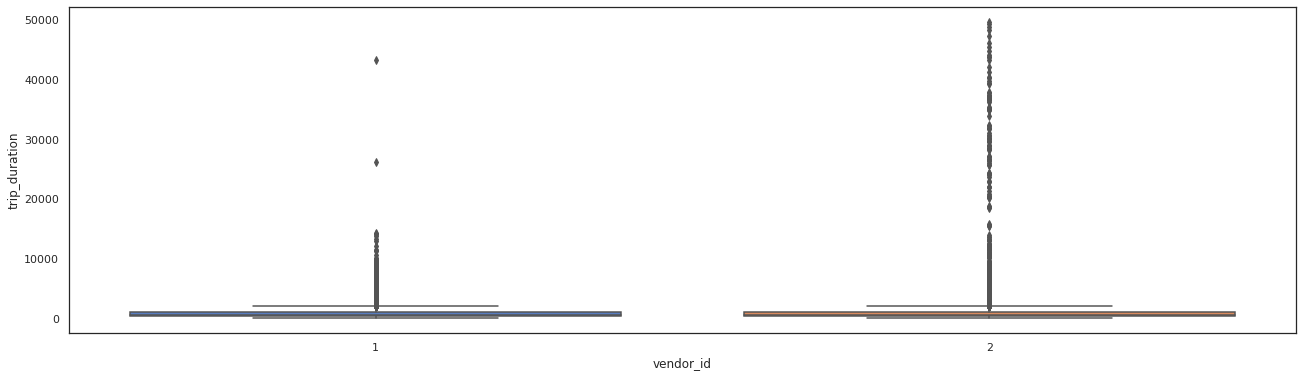

In [30]:
plt.figure(figsize=(22, 6))
df_sub = dfm[dfm['trip_duration'] < 50000]
sns.boxplot(x="vendor_id", y="trip_duration", data=df_sub)
plt.show()

As you can see, we were in a false perception earlier that vendor 1 had more outliers. Since the median is just around 600 seconds, we observe that vendor 2 has many more outliers as compared to vendor 1. Next, to confirm this, we will quickly look at the mean wrt day of week for both vendors using tsplot (time series plot) from seaborn.

**Trip Duration vs Passenger Count**

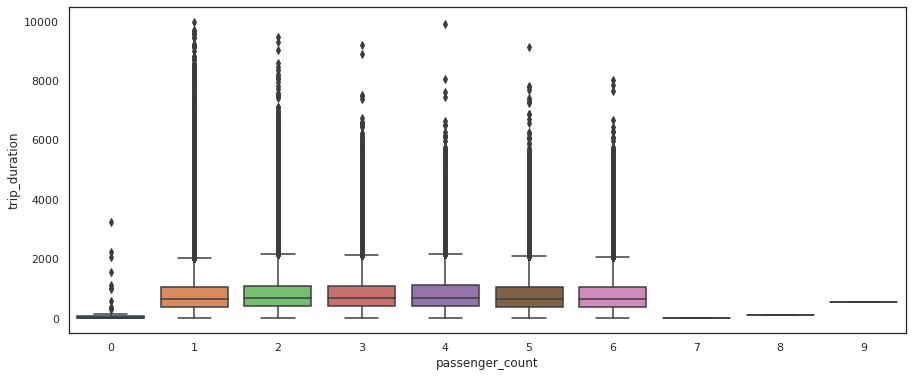

In [31]:
dfm.passenger_count.value_counts()
plt.figure(figsize=(15, 6))
df_sub = dfm[dfm['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=df_sub)
plt.show()

* The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3.
* Another key observation is that the number of outliers are reduced for higher passenger counts but that only comes down to the individual frequencies of each passenger count.

**Trip Duration per hour**

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads. Trip duration is the lowest around 6 am as streets may not be busy.

**Trip Duration per Day of Week**

Trip duration is the longest on Thursdays closely followed by Fridays.

**Trip Duration per month**

In [37]:
sns.lineplot(x='pickup_month',y='trip_duration',data=dfm)

ValueError: ignored

From February, we can see trip duration rising every month.

**Correlation Heatmap**

Let us quickly look at the correlation heatmap to check the correlations amongst all features.

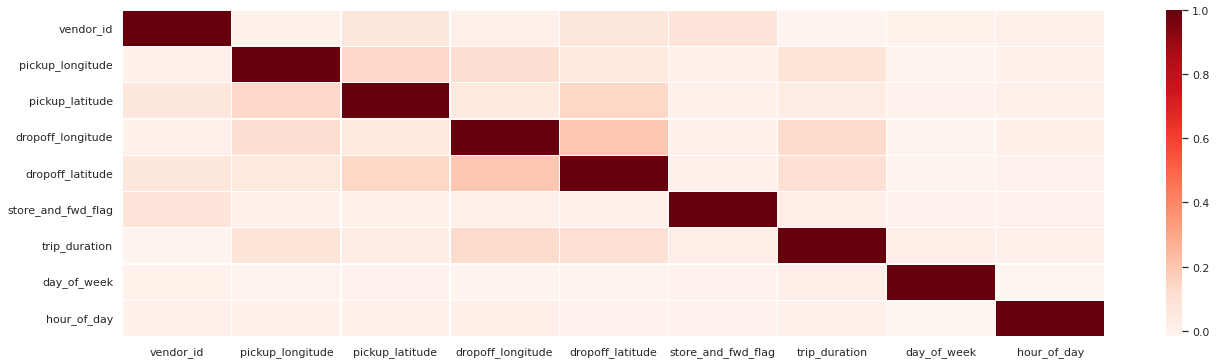

In [33]:
plt.figure(figsize=(22, 6))
sf = dfm.drop(['id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count','check_trip_duration','log_trip_duration'],
        axis=1)
corr = sf.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="Reds")

# **Preprocessing & Feature Extraction**

Some of my ideas to create new variables and the reasons are as follows

1.Difference between pickup and dropoff latitude - will give an idea about the distance covered which could be predictive

2.Difference between pickup and dropoff longitude - same reason as above

3.Haversine distance between pickup and dropoff co-ordinates - to capture the actual distance travelled.

4.Pickup minute - since pickup hour is an important variable, the minute of pickup might well have been predictive.

5.Pickup day of year - same reason as above

**DateTime Conversion**

The datetime features from csv files are read as strings and in order to easily extract features like day of week, month, year etc. we need to convert it into datetime format of python.

In [34]:
nyc=df.copy()

In [35]:
# converting strings to datetime features
nyc['pickup_datetime'] = pd.to_datetime(nyc.pickup_datetime)
nyc['dropoff_datetime'] = pd.to_datetime(nyc.dropoff_datetime)

In [36]:
# Log transform the Y values
df_y = np.log1p(nyc['trip_duration'])

# Add some datetime features
nyc.loc[:, 'pickup_weekday'] = nyc['pickup_datetime'].dt.weekday
nyc.loc[:, 'pickup_hour_weekofyear'] = nyc['pickup_datetime'].dt.weekofyear
nyc.loc[:, 'pickup_hour'] = nyc['pickup_datetime'].dt.hour
nyc.loc[:, 'pickup_minute'] = nyc['pickup_datetime'].dt.minute
nyc.loc[:, 'pickup_dt'] = (nyc['pickup_datetime'] - nyc['pickup_datetime'].min()).dt.total_seconds()
nyc.loc[:, 'pickup_week_hour'] = nyc['pickup_weekday'] * 24 + nyc['pickup_hour']

**Distance Features**

As discussed earlier, distance features must be important and must be included here

**Eucledian Distance**

Let's Calculate the Eucledian distance between pickup and drop off location to get some idea on how far the pickup and dropoff points are since this would definitely impact the trip duration even though we know that cars can't fly

In [38]:
#displacement
y_dist= nyc['pickup_longitude'] - nyc['dropoff_longitude']
x_dist = nyc['pickup_latitude'] - nyc['dropoff_latitude']

#square distance
nyc['dist_sq'] = (y_dist ** 2) + (x_dist ** 2)

#distance
nyc['dist_sqrt'] = nyc['dist_sq'] ** 0.5

**Haversine Distance**

Let's calculate the distance (km) between pickup and dropoff points. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. We will also calculate the approximate angle at which the dropoff location lies wrt the pickup location. pd.DataFrame.apply() would be too slow so the haversine function is rewritten to handle arrays.

Haversine direction represents the information of angle of the line connecting the dropoff and pickup point over the surface of earth wrt equator.



In [39]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def direction_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


nyc['haversine_distance'] = haversine_array(nyc['pickup_latitude'].values, 
                                                     nyc['pickup_longitude'].values, 
                                                     nyc['dropoff_latitude'].values, 
                                                     nyc['dropoff_longitude'].values)


nyc['direction'] = direction_array(nyc['pickup_latitude'].values, 
                                          nyc['pickup_longitude'].values, 
                                          nyc['dropoff_latitude'].values, 
                                          nyc['dropoff_longitude'].values)

**Binning**

The lattitude and longitude could be a bit noisy and it might be a good idea to bin them and create new features after rounding their values.

In [40]:
## Binned Coordinates ###
nyc['pickup_latitude_round3'] = np.round(nyc['pickup_latitude'],3)
nyc['pickup_longitude_round3'] = np.round(nyc['pickup_longitude'],3)

nyc['dropoff_latitude_round3'] = np.round(nyc['dropoff_latitude'],3)
nyc['dropoff_longitude_round3'] = np.round(nyc['dropoff_longitude'],3)

**One Hot Encoding**

Here, Vendor ID can be converted to one hot encoding or frequency encoding since in the raw data it has values 1 and 2 without any inherent order.

In [41]:
dfm.vendor_id.value_counts()

2    776965
1    675420
Name: vendor_id, dtype: int64

Now, there is not much difference in the frequencies of both and that might not make for an important feature. so we will just convert it to 0 and 1 by subtracting 1 from it

In [42]:
nyc['vendor_id'] = df['vendor_id'] - 1


In [43]:
np.sum(pd.isnull(nyc))

id                          0
vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
pickup_weekday              0
pickup_hour_weekofyear      0
pickup_hour                 0
pickup_minute               0
pickup_dt                   0
pickup_week_hour            0
dist_sq                     0
dist_sqrt                   0
haversine_distance          0
direction                   0
pickup_latitude_round3      0
pickup_longitude_round3     0
dropoff_latitude_round3     0
dropoff_longitude_round3    0
dtype: int64

Before we go on to build a model, we must drop the variables that should not be fed as features to the algorithms. We will drop

* id - Uniquely represents a sample in the train set
* pickup_datetime - Since we have extracted the datetime features, there is no need to keep the datetime column
* dropoff_datetime - If this is used to create features, it would be a leakage and we will get perfect model performance. Why? The time gap between dropoff_datetime and pickup_datetime is essentially what we are trying to predict
* trip_duration - This is the target variable so needs to be dropped
store_and_fwd_flag - This variable is not available before the start of the trip and should not be used for modelling.

In [44]:
nyc = nyc.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration','store_and_fwd_flag'], axis=1)

# **Model Building**

In [45]:
nyc.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_weekday,pickup_hour_weekofyear,pickup_hour,pickup_minute,pickup_dt,pickup_week_hour,dist_sq,dist_sqrt,haversine_distance,direction,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,11,17,24,6369878.0,17,0.000313,0.017680,1.498521,99.970196,40.768,-73.982,40.766,-73.965
1,0,1,-73.980415,40.738564,-73.999481,40.731152,6,23,0,43,14085798.0,144,0.000418,0.020456,1.805507,-117.153768,40.739,-73.980,40.731,-73.999
2,1,1,-73.979027,40.763939,-74.005333,40.710087,1,3,11,35,1596907.0,35,0.003592,0.059934,6.385098,-159.680165,40.764,-73.979,40.710,-74.005
3,1,1,-74.010040,40.719971,-74.012268,40.706718,2,14,19,32,8364734.0,67,0.000181,0.013438,1.485498,-172.737700,40.720,-74.010,40.707,-74.012
4,1,1,-73.973053,40.793209,-73.972923,40.782520,5,12,13,30,7392638.0,133,0.000114,0.010690,1.188588,179.473585,40.793,-73.973,40.783,-73.973


We have all numerical data types in our dataset now. Time to delve into model building. A very simple baseline could just be the mean of the values in the train set. Let's check the performance on that.


**Test Train Split**

We have all numbers in our dataset now. Time to delve into model building. But before that, we need to finalise a validation strategy to create the train and test sets. Here, we will do a random split and keep one third of the data in test set and remaining two third of data in the train set

In [46]:
#Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(nyc,df_y,test_size=1/3, random_state=0)

**Mean Prediction**

Before we go on to try any machine learning model, let us look at the performance of a basic model that just says the mean of trip duration in the train set is the prediction for all the trips in the test set.

In [47]:
mean_pred = np.repeat(ytrain.mean(),len(ytest))

sqrt(mean_squared_error(ytest, mean_pred))

0.7932210515663911

# **Cross validation**
Cross Validation is one of the most important concepts in any type of data modelling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.

we divide the entire population into k equal samples. Now we train models on k-1 samples and validate on 1 sample. Then, at the second iteration we train the model with a different sample held as validation.

In k iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power.

In [48]:
def cv_score(ml_model, rstate = 11,cols = nyc.columns):
    i = 1
    cv_scores = []
    df1 = nyc.copy()
    df1 = nyc[cols]
    
    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    for train_index,test_index in kf.split(df1,df_y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[train_index],df1.loc[test_index]
        ytr,yvl = df_y[train_index],df_y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        rmse_score_train = sqrt(mean_squared_error(ytr, train_val))
        rmse_score = sqrt(mean_squared_error(yvl, pred_val))
        sufix = ""
        msg = ""
        #msg += "Train RMSE: {:.5f} ".format(rmse_score_train)
        msg += "Valid RMSE: {:.5f}".format(rmse_score)
        print("{}".format(msg))
        # Save scores
        cv_scores.append(rmse_score)
        i+=1
    return cv_scores

# **Linear Regression**

Lets begin by using the simplest regression algorithm Linear regression to check the performance.

In [49]:
linreg_scores = cv_score(LinearRegression())


1 of kfold 5
Valid RMSE: 0.61369

2 of kfold 5
Valid RMSE: 0.61481

3 of kfold 5
Valid RMSE: 0.61963

4 of kfold 5
Valid RMSE: 0.61161

5 of kfold 5
Valid RMSE: 0.61786


# **Decision tree**

1.I will implement a Decision Tree Regressor first for three primary reasons:

2.it is the easiest to interpret

3.Does not require feature scaling

4.computationally less expensive than other methods

In [50]:
dtree_scores = cv_score(DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25))


1 of kfold 5
Valid RMSE: 0.42935

2 of kfold 5
Valid RMSE: 0.42346

3 of kfold 5
Valid RMSE: 0.42965

4 of kfold 5
Valid RMSE: 0.42828

5 of kfold 5
Valid RMSE: 0.42853


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [51]:
results_df = pd.DataFrame({'linear_regression':linreg_scores, 'dtree': dtree_scores})

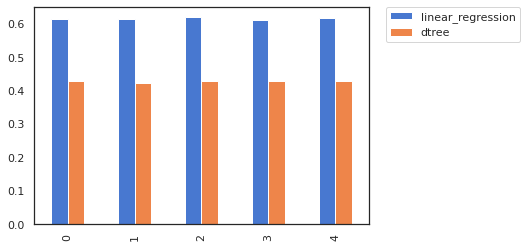

In [52]:
results_df.plot(y=["linear_regression", "dtree"], kind="bar", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Decision Tree is better than Linear regression

In [ ]:
from sklearn import tree

In [ ]:
dtree = DecisionTreeRegressor(min_samples_leaf=25,min_samples_split=25)
dtree.fit(xtrain,ytrain)

NameError: ignored

In [ ]:
decision_tree=tree_export_graphviz(dtree,out_file="tree.dot",feature_names=xtrain.columns,max_depth=2,filled=True)

# **Decision tree**

I will implement a Decision Tree Regressor first for three primary reasons:

it is the easiest to interpret

does not require feature scaling

computationally less expensive than other methods

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate model object
dtree = DecisionTreeRegressor()

# Fit to training data
dtree.fit(xtrain,ytrain)
print(dtree)

# Predict
y_pred_dtree = dtree.predict(xtest)

# Score It
from sklearn import metrics
print('\nDecision Tree Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(ytest,y_pred_dtree))
print('MAE:',metrics.mean_absolute_error(ytest,y_pred_dtree))
print('MSE:',metrics.mean_squared_error(ytest,y_pred_dtree))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest,y_pred_dtree)))

DecisionTreeRegressor()

Decision Tree Regression Performance Metrics
R^2= 0.4760368320419779
MAE: 0.3636475976605979
MSE: 0.3297498188335384
RMSE: 0.5742384686117243


**Learning curve**

Learning curves constitute a great tool to diagnose bias and variance in any supervised learning algorithm. It shows how error changes as the training set size increases. We'll use the learning_curve() function from the scikit-learn library to generate a learning curve for the regression model. There's no need to put aside a validation set because learning_curve() will take care of that and that's why we will plot the learning curve over whole dataset.

In [ ]:
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

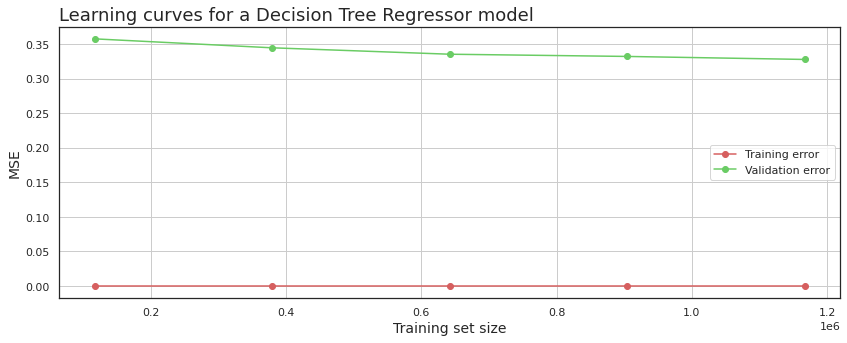

In [ ]:
def learning_curves(estimator, title, features, target, train_sizes, cv, n_jobs=-1):
    plt.figure(figsize = (14,5))
    train_sizes, train_scores, validation_scores = learning_curve(estimator, features, target, train_sizes = train_sizes, cv = cv, scoring = 'neg_mean_squared_error',  n_jobs=n_jobs)
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean,'o-', color="r", label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean,'o-', color="g", label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    
    title = 'Learning curves for a ' + title + ' model'
    plt.title(title, fontsize = 18, loc='left')
    
    plt.legend(loc="best")
    
    return plt

# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=4)

# Plot learning curve for the RF Regressor
title = "Decision Tree Regressor"

# Call learning curve with all dataset i.e. traininig and test combined because CV will take of data split.
learning_curves(dtree, title, dfm,df_y, train_sizes=np.linspace(.1, 1.0, 5), cv=cv, n_jobs=-1)

In [53]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [54]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [55]:
lasso_regressor.score(xtrain, ytrain)

0.394651949072929

In [56]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  0.3876624406292243


In [58]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [62]:
ridge_regressor.score(xtrain, ytrain)

0.3999213333782985

In [63]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  0.3876624406292243


# **Conclusion**

1. Mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.
2. Most trips were taken on Friday and Monday being the least.
we observe that most pickups and drops occur in the evening. While the least drops and pickups occur during morning.
3. The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and the least are the ones taken in the early morning(between 6–7 hours)
4. vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips.
5. The flag was stored only for short duration trips and for long duration trips the flag was never stored.
6. Desion tree model give more accurate value on data set than linear regression model.
[ ]
